# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as pyplot
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


Prob 1: my approach is to lay down real data distribution with normal distribution in one graph. 

In [4]:
mean, std = df['temperature'].mean(), df['temperature'].std()


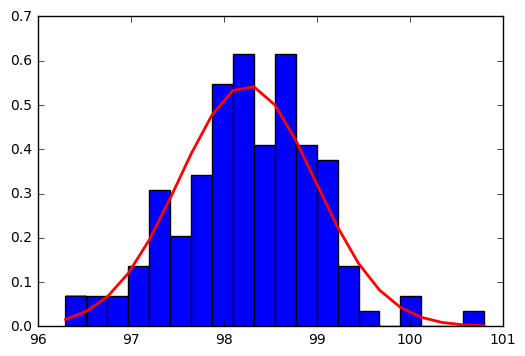

In [5]:
count, bins, ignored = pyplot.hist(df['temperature'], 20, normed=True)
pyplot.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *np.exp( - (bins - mean)**2 / (2 * std**2) ),linewidth=2, color='r')

By comparing histogram of temperature data distribution, and normal distribution, temperature distribution is close to normal distribution.

Prob 2: sample size is 130, medium sized sample. The observations are only considered independent if the experiments are taken with independent conditions.

In [6]:
df.shape

(130, 3)

Prob 3: We don't know whether the temperature is dependent on sex or not. I first use one sample test. Because the sample size is bigger than 30, I will use z statistics. 

In [7]:
mean

98.24923076923078

In [8]:
std

0.7331831580389454

If assume temperature is normal distribution with mean 98.6. The sample mean distribution for 130 samples is normal distribution with standard deviation is (std in sample)/sqrt(sample size). Caculate how many sigma is the sample mean away from the mean assumed in hypothesis. Based on the caculation below, the experimental result is 5.45 sigma away from mean, the probability of that is extremely small. The hypothesis that temperature is normal distribution with mean 98.6 therefore is rejected.

In [9]:
num_of_sigma=(98.6-mean)/(std/np.sqrt(130))
num_of_sigma

5.4548232923640789

Then use two-sample tests, treat male and female as two normal distributions. 

In [20]:
num_of_sigma_F=(98.6-df[df['gender']=='F']['temperature'].mean())/(df[df['gender']=='F']['temperature'].std()/np.sqrt(len(df[df['gender']=='F'])))
num_of_sigma_F

2.2354980796786501

98.6 is 2.23 std away from sample mean, probability of this event is small as well. But bigger than the last one sample test. 

In [21]:
num_of_sigma_M=(98.6-df[df['gender']=='M']['temperature'].mean())/(df[df['gender']=='M']['temperature'].std()/np.sqrt(len(df[df['gender']=='M'])))
num_of_sigma_M

5.7157574493183638

Prob 4: In normal distribution, we are 95% confident that value will be within 1.96*sigma of mean

In [11]:
# confidence interval:
a=(mean-1.96*std,mean+1.96*std)
a

(96.81219177947445, 99.68626975898711)

In [24]:
margin_of_error=std/np.sqrt(130)
margin_of_error

0.06430441683789101

Prob 5: Null hyperthesis: man and woman has the same temperature distribution, the difference I see in man and woman's temperatures are due to random sampling. 

In [12]:
#observe this difference between temperatures of man and woman.
df[df['gender']=='F']['temperature'].mean()-df[df['gender']=='M']['temperature'].mean()

0.289230769230727

In [13]:
df[df['gender']=='F']['temperature'].count()

65

In [14]:
df[df['gender']=='M']['temperature'].count()

65

I will do the following experiment for a large amount of times: 
1 I shuffle the data 
2 get half and half
3 caculate the absolute value of their difference between their means

after a large amount of experiment, I will calculate the percentage of mean different more than 0.29.
If the simulated probablity is high, that means it is possible that the difference we see in man and woman's temperatures are due to random sampling.  

In [15]:
tp=df['temperature'].copy()

tp_mean_diff=[]
for i in range(1,1000):
    np.random.shuffle(tp)
    tp_mean_diff.append(tp[:65].mean()-tp[65:].mean())
    
tp_mean_diff

[0.09230769230768487,
 -0.08615384615387711,
 0.22153846153847212,
 -0.030769230769237765,
 -0.006153846153793552,
 0.2584615384615603,
 -0.19692307692309896,
 -0.08615384615383448,
 -0.027692307692390727,
 0.03692307692310237,
 0.04307692307689592,
 0.06461538461539362,
 -0.15692307692310692,
 -0.24307692307685613,
 -0.24307692307699824,
 0.021538461538426645,
 0.12000000000001876,
 0.07692307692310862,
 0.08615384615389132,
 0.021538461538469278,
 -0.32615384615378673,
 0.018461538461551186,
 -0.1661538461538754,
 -0.027692307692376517,
 -0.018461538461522764,
 -0.03692307692305974,
 -0.12000000000000455,
 0.11076923076922185,
 0.03384615384615586,
 -0.018461538461536975,
 0.10769230769228955,
 -0.126153846153926,
 0.12307692307695106,
 -0.036923076923002895,
 0.021538461538455067,
 0.09846153846156369,
 0.006153846153864606,
 0.15076923076925652,
 -0.07076923076925823,
 -0.21846153846148297,
 0.13846153846156994,
 0.08615384615387711,
 0.021538461538440856,
 0.052307692307749676,
 -

In [16]:
pos=np.abs(np.array(tp_mean_diff))>0.29
prob=pos.sum()/len(pos)
prob

0.027027027027027029

By running the experiment 1000 times, the probability that the mean between two randomized groups from the data of all people is bigger than 0.29 is 2.6%, which is smaller than significance level of 5% generally used in statistics. Therefore the null hypothesis that the difference in man and woman's temperatures are due to random sampling is not likely to be true. 

Another way is to use t-test:

In [28]:
from scipy import stats
p=stats.ttest_ind(df[df['gender']=='F']['temperature'], df[df['gender']=='M']['temperature']).pvalue
p<0.05

True

pvalue is smaller than 0.05 threshod, we can reject the hypothesis that man and woman temperture are the same